In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/GenAi projects/logs classification system/training/datasets/synthetic_logs.csv")
df.head()

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert


In [3]:
df

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert
...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert


In [4]:
df.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [5]:
df.complexity.unique()

array(['bert', 'regex', 'llm'], dtype=object)

In [6]:
df.target_label.unique()


array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

In [8]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN



c:\GenAi projects\logs classification system\logsclass\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load pretrained sentence transformer model

In [9]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['log_message'].tolist())



Perform DBSCAN Clustering

In [10]:
dbscan=DBSCAN(eps=0.2, min_samples=1,metric='cosine')
clusters=dbscan.fit_predict(embeddings)


In [11]:
df['cluster']=clusters

In [12]:
df.head()

,timestamp,source,log_message,target_label,complexity,cluster
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0


Now our target is to find the patterns using regex...for this firstly we need to check that whether our clustering working well or not ... so we are going to check for all value of cluster==0 ..is it covering any pattern or not...if not then we will modify our custering model parameters

initial paremeters are ..
dbscan=DBSCAN(eps=0.5, min_samples=5,metric='cosine')

the result of using these parametres are not good ..


now updated model 

dbscan=DBSCAN(eps=0.2, min_samples=1,metric='cosine')

the result of using these parametres are good ..




In [13]:
df[df.cluster==0].head()

,timestamp,source,log_message,target_label,complexity,cluster
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0
5,2025-10-09 10:30:31,ModernHR,nova.osapi_compute.wsgi.server [req-f0bffbc3-5...,HTTP Status,bert,0
9,2025-03-30 04:01:45,ModernHR,nova.osapi_compute.wsgi.server [req-2bf7cfee-a...,HTTP Status,bert,0


In [14]:
df[df.cluster==25]

,timestamp,source,log_message,target_label,complexity,cluster
62,1/19/2025 13:55,ModernCRM,System configuration is no longer valid,Critical Error,bert,25
453,4/4/2025 6:46,BillingSystem,Configuration is corrupted throughout the system,Critical Error,bert,25
578,10/11/2025 2:24,ModernCRM,Cross-system configuration failure occurred,Critical Error,bert,25
731,1/21/2025 23:32,BillingSystem,System configuration is experiencing errors,Critical Error,bert,25
917,11/9/2025 19:32,ModernHR,Configuration malfunction is system-wide,Critical Error,bert,25
981,4/2/2025 5:03,AnalyticsEngine,Entire system configuration is faulty,Critical Error,bert,25
1876,10/9/2025 8:30,BillingSystem,System configuration errors have been detected,Critical Error,bert,25
2052,10/14/2025 13:13,ThirdPartyAPI,System configuration has been severely damaged,Critical Error,bert,25
2090,6/18/2025 22:26,ModernCRM,System-wide configuration failure has occurred,Critical Error,bert,25
2153,3/12/2025 16:22,ModernHR,System configuration files are corrupted,Critical Error,bert,25


Now sort clusters by number of records in it ...then print 5 log messages from those cluster tht has more than a 10 records in it

In [15]:
cluster_counts=df['cluster'].value_counts()
large_clusters=cluster_counts[cluster_counts > 10].index

for cluster in large_clusters:
    print(f"clusters {cluster}: ")
    print(df[df['cluster']==cluster]['log_message'].head(5).to_string(index=False))
    print()

clusters 0: 
nova.osapi_compute.wsgi.server [req-b9718cd8-f6...
nova.osapi_compute.wsgi.server [req-4895c258-b2...
nova.osapi_compute.wsgi.server [req-ee8bc8ba-92...
nova.osapi_compute.wsgi.server [req-f0bffbc3-5a...
nova.osapi_compute.wsgi.server [req-2bf7cfee-a2...

clusters 5: 
nova.compute.claims [req-a07ac654-8e81-416d-bfb...
nova.compute.claims [req-d6986b54-3735-4a42-907...
nova.compute.claims [req-72b4858f-049e-49e1-b31...
nova.compute.claims [req-5c8f52bd-8e3c-41f0-95a...
nova.compute.claims [req-d38f479d-9bb9-4276-968...

clusters 11: 
User User685 logged out.
 User User395 logged in.
 User User225 logged in.
User User494 logged out.
 User User900 logged in.

clusters 13: 
Backup started at 2025-05-14 07:06:55.
Backup started at 2025-02-15 20:00:19.
  Backup ended at 2025-08-08 13:06:23.
Backup started at 2025-11-14 08:27:43.
Backup started at 2025-12-09 10:19:11.

clusters 7: 
Multiple bad login attempts detected on user 85...
Multiple login failures occurred on user 9052 a.

In [16]:
import re
def classify_with_regex(log_message):
    regex_patterns = {
        r"User User\d+ logged (in|out).": "User Action",
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully.": "System Notification",
        r"System updated to version .*": "System Notification",
        r"File .* uploaded successfully by user .*": "System Notification",
        r"Disk cleanup completed successfully.": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Account with ID .* created by .*": "User Action"
    }
    for pattern, label in regex_patterns.items():
        if re.search(pattern, log_message,re.IGNORECASE):
            return label
    return None

In [17]:
classify_with_regex( "Backup ended at 2025-08-08 13:06:23.")

'System Notification'

In [18]:
classify_with_regex("nova.compute.claims [req-a07ac654-8e81-416d-bfb...")

In [19]:
classify_with_regex("System updated to version 3.9.1.")

'System Notification'

In [20]:
df['regex_label']=df['log_message'].apply(classify_with_regex)


now i want to see the data for which regex is not working well ....and does not classify them into a pattern


In [21]:
df[df.regex_label.isna()]

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0,None
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,7,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0,None
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1,None


In [22]:
df.shape

(2410, 7)

now we want to check how many ot them canot be classified by regex

In [23]:
df[df.regex_label.isna()].shape

(1910, 7)

out of 2410 log messages only 500 log messages are classified by regex ..

In [24]:
df.drop('complexity', axis=1, inplace=True)

In [25]:
df.head()

,timestamp,source,log_message,target_label,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,None


In [26]:
df_not_regex=df[df.regex_label.isna()].copy()

In [27]:
df_not_regex


,timestamp,source,log_message,target_label,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,None
...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,0,None
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,7,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,0,None
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,1,None


In [47]:
df_not_regex['target_label'].value_counts()

target_label
HTTP Status            1017
Security Alert          371
Error                   177
Resource Usage          177
Critical Error          161
Workflow Error            4
Deprecation Warning       3
Name: count, dtype: int64

from here we can say that for only target label =="Workflow Error" && "Deprecation Warning" we will use LLM ...     

In [28]:
df_not_regex[df_not_regex.source=='LegacyCRM']

,timestamp,source,log_message,target_label,cluster,regex_label
60,2025-10-06 16:55:23,LegacyCRM,Lead conversion failed for prospect ID 7842 du...,Workflow Error,24,None
255,2025-05-03 16:55:35,LegacyCRM,API endpoint 'getCustomerDetails' is deprecate...,Deprecation Warning,48,None
377,2025-06-24 12:16:29,LegacyCRM,Customer follow-up process for lead ID 5621 fa...,Workflow Error,62,None
1325,2025-04-17 07:33:44,LegacyCRM,Escalation rule execution failed for ticket ID...,Workflow Error,105,None
1734,2025-04-30 07:47:30,LegacyCRM,The 'ExportToCSV' feature is outdated. Please ...,Deprecation Warning,118,None
1826,2025-01-23 10:33:36,LegacyCRM,Support for legacy authentication methods will...,Deprecation Warning,122,None
2217,2025-05-12 09:46:54,LegacyCRM,Task assignment for TeamID 3425 could not comp...,Workflow Error,133,None


In [29]:
df_not_regex_not_bert=df_not_regex[df_not_regex.source=="LegacyCRM"]

In [30]:
df_not_regex_not_bert
## OR WE CAN SAY THAT THESE CAN ONLY BE DONE BY USING LLM FULL

,timestamp,source,log_message,target_label,cluster,regex_label
60,2025-10-06 16:55:23,LegacyCRM,Lead conversion failed for prospect ID 7842 du...,Workflow Error,24,None
255,2025-05-03 16:55:35,LegacyCRM,API endpoint 'getCustomerDetails' is deprecate...,Deprecation Warning,48,None
377,2025-06-24 12:16:29,LegacyCRM,Customer follow-up process for lead ID 5621 fa...,Workflow Error,62,None
1325,2025-04-17 07:33:44,LegacyCRM,Escalation rule execution failed for ticket ID...,Workflow Error,105,None
1734,2025-04-30 07:47:30,LegacyCRM,The 'ExportToCSV' feature is outdated. Please ...,Deprecation Warning,118,None
1826,2025-01-23 10:33:36,LegacyCRM,Support for legacy authentication methods will...,Deprecation Warning,122,None
2217,2025-05-12 09:46:54,LegacyCRM,Task assignment for TeamID 3425 could not comp...,Workflow Error,133,None


In [31]:
df_not_regex_yes_bert=df_not_regex[df_not_regex.source!="LegacyCRM"]

In [32]:
df_not_regex_yes_bert

,timestamp,source,log_message,target_label,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,None
...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,0,None
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,7,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,0,None
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,1,None


In [33]:
embeddings_not_regex_yes_bert=model.encode(df_not_regex_yes_bert['log_message'].tolist())

In [34]:
embeddings_not_regex_yes_bert[:2]

array([[-1.02939621e-01,  3.35459411e-02, -2.20260732e-02,
         1.55101740e-03, -9.86917876e-03, -1.78956270e-01,
        -6.34409785e-02, -6.01761639e-02,  2.81109158e-02,
         5.99620491e-02, -1.72618348e-02,  1.43363548e-03,
        -1.49560034e-01,  3.15287686e-03, -5.66030927e-02,
         2.71685235e-02, -1.49891041e-02, -3.54037657e-02,
        -3.62936445e-02, -1.45410765e-02, -5.61491773e-03,
         8.75539035e-02,  4.55120578e-02,  2.50963885e-02,
         1.00187510e-02,  1.24267349e-02, -1.39923573e-01,
         7.68696293e-02,  3.14095505e-02, -4.15247958e-03,
         4.36902344e-02,  1.71250012e-02, -8.00951198e-02,
         5.74006326e-02,  1.89091656e-02,  8.55262503e-02,
         3.96398641e-02, -1.34371817e-01, -1.44360063e-03,
         3.06704035e-03,  1.76854044e-01,  4.44885530e-03,
        -1.69274509e-02,  2.24266481e-02, -4.35049310e-02,
         6.09034160e-03, -9.98169929e-03, -6.23972900e-02,
         1.07372422e-02, -6.04895083e-03, -7.14660808e-0

In [35]:
X=embeddings_not_regex_yes_bert
y=df_not_regex_yes_bert['target_label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_train ,X_test ,y_train ,y_test=train_test_split(X,y, test_size=0.3,random_state=42)
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
report=classification_report(y_test , y_pred)
print (report)

                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       0.98      0.89      0.93        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      0.99      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.98      0.98       571
  weighted avg       0.99      0.99      0.99       571



# Now I am trying to apply naive bayes 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predict on test set
y_pred = nb_clf.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)


                precision    recall  f1-score   support

Critical Error       0.86      1.00      0.92        48
         Error       0.83      0.83      0.83        47
   HTTP Status       1.00      0.97      0.99       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       0.99      0.99      0.99       123

      accuracy                           0.97       571
     macro avg       0.94      0.96      0.95       571
  weighted avg       0.97      0.97      0.97       571



Random forest.

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       1.00      0.89      0.94        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      1.00      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.98      0.98       571
  weighted avg       0.99      0.99      0.99       571



2. Support Vector Machine (SVM)


Effective for high-dimensional spaces, though slower on large datasets.

In [39]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')  # You can also try 'linear'
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

Critical Error       0.94      1.00      0.97        48
         Error       1.00      0.94      0.97        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      1.00      1.00       123

      accuracy                           0.99       571
     macro avg       0.99      0.99      0.99       571
  weighted avg       1.00      0.99      0.99       571



3. K-Nearest Neighbors (KNN)


Simple and effective, but can be slow for large datasets.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

Critical Error       0.96      0.98      0.97        48
         Error       0.98      0.96      0.97        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      1.00      1.00       123

      accuracy                           0.99       571
     macro avg       0.99      0.99      0.99       571
  weighted avg       0.99      0.99      0.99       571



4. Gradient Boosting (like XGBoost or LightGBM)


Powerful and widely used for structured/tabular data.

In [41]:
from xgboost import XGBClassifier

clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['Critical Error' 'Error' 'HTTP Status' 'Resource Usage' 'Security Alert']

c:\GenAi projects\logs classification system\logsclass\lib\site-packages\xgboost\training.py:183: UserWarning: [19:52:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


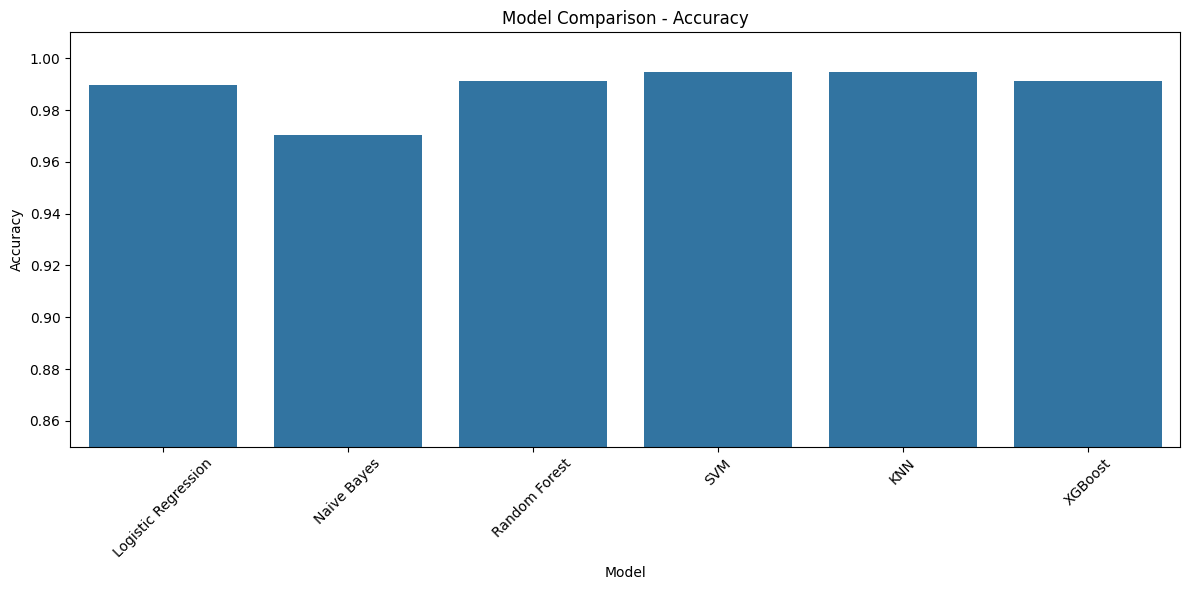

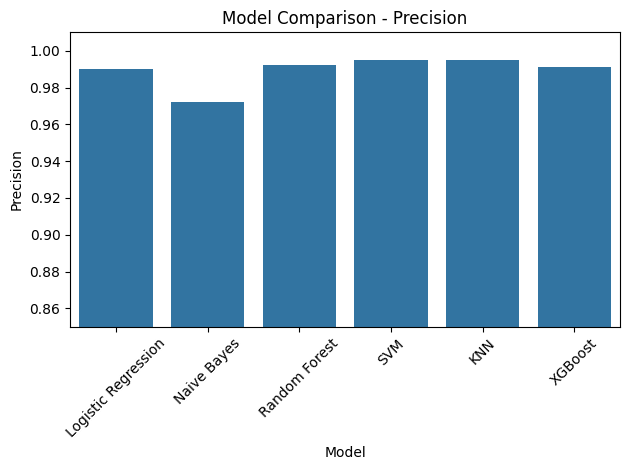

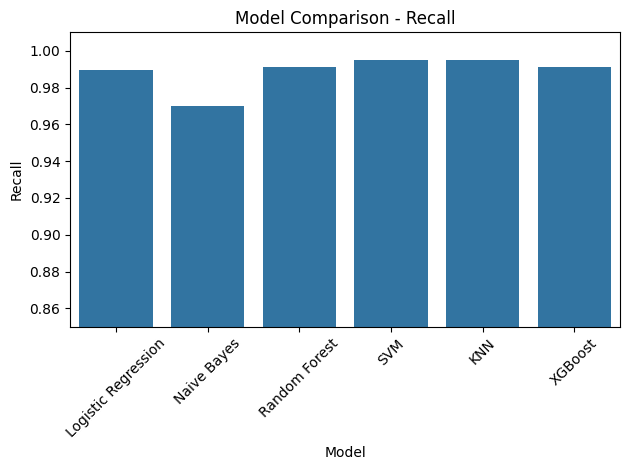

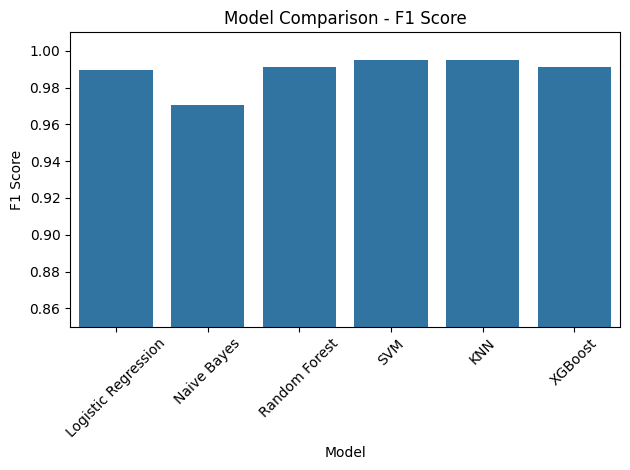

In [42]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 2: Train-test split on encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Step 3: Define models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Step 4: Evaluate each model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

df_results = pd.DataFrame(results)

# Step 5: Plot performance comparison
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    sns.barplot(data=df_results, x="Model", y=metric)
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.ylim(0.85, 1.01)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


c:\GenAi projects\logs classification system\logsclass\lib\site-packages\xgboost\training.py:183: UserWarning: [19:53:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model Comparison Table:

                 Model  Train Accuracy  Test Accuracy  Train F1   Test F1
0  Logistic Regression        0.995495       0.989492  0.995497  0.989472
1          Naive Bayes        0.982733       0.970228  0.982897  0.970673
2        Random Forest        1.000000       0.991243  1.000000  0.991214
3                  SVM        0.999249       0.994746  0.999249  0.994739
4                  KNN        0.997748       0.994746  0.997747  0.994745
5              XGBoost        1.000000       0.991243  1.000000  0.991231


<Figure size 1000x600 with 0 Axes>

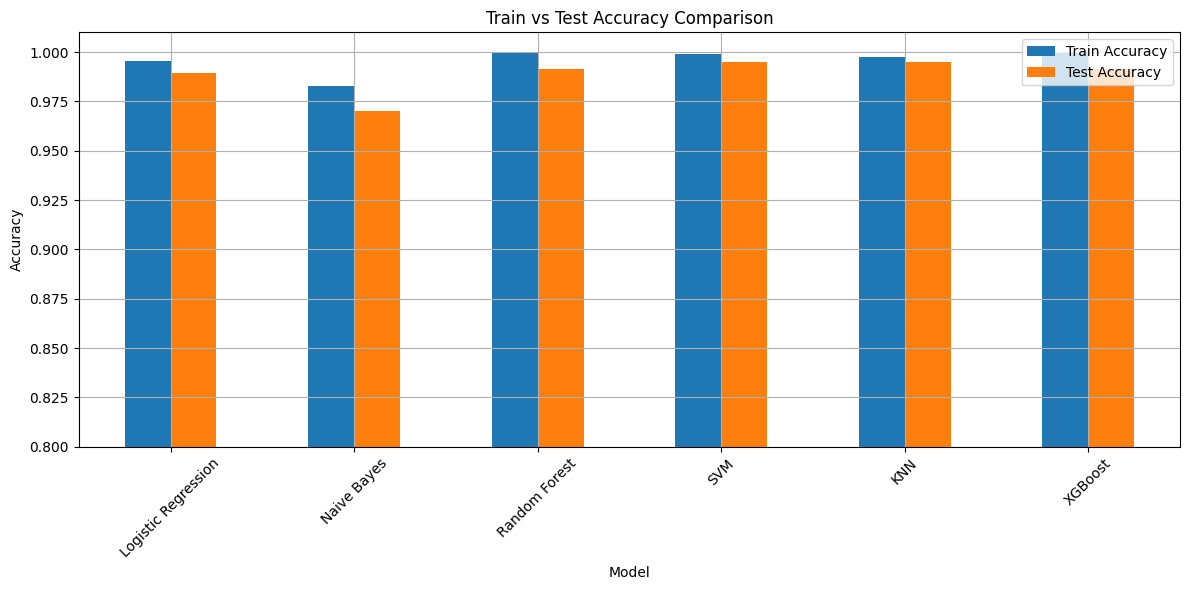

<Figure size 1000x600 with 0 Axes>

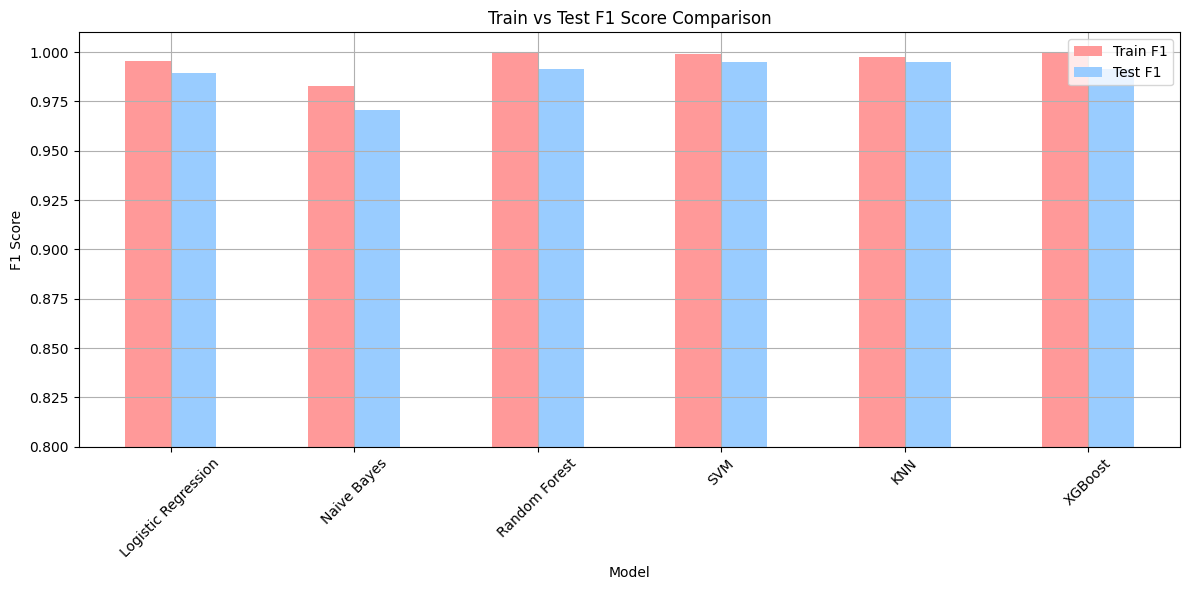

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# 1. Encode target labels if they are categorical (string)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# 3. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# 4. Store train/test metrics to detect overfitting/underfitting
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train F1": f1_score(y_train, y_train_pred, average='weighted'),
        "Test F1": f1_score(y_test, y_test_pred, average='weighted')
    })

# 5. Create results DataFrame
df_compare = pd.DataFrame(results)
print("\nModel Comparison Table:\n")
print(df_compare)

# 6. Accuracy Comparison Bar Chart
plt.figure(figsize=(10, 6))
df_compare.plot(x='Model', y=['Train Accuracy', 'Test Accuracy'], kind='bar', figsize=(12, 6))
plt.title("Train vs Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.8, 1.01)
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. F1 Score Comparison Bar Chart
plt.figure(figsize=(10, 6))
df_compare.plot(x='Model', y=['Train F1', 'Test F1'], kind='bar', figsize=(12, 6), color=['#FF9999','#99CCFF'])
plt.title("Train vs Test F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0.8, 1.01)
plt.grid(True)
plt.tight_layout()
plt.show()


we are preferring interpretability thats why we are choosing logistic regression 

In [44]:
X_train ,X_test ,y_train ,y_test=train_test_split(X,y, test_size=0.3,random_state=42)
clf_final=LogisticRegression(max_iter=1000)
clf_final.fit(X_train,y_train)
y_pred=clf_final.predict(X_test)
report=classification_report(y_test , y_pred)
print (report)

                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       0.98      0.89      0.93        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      0.99      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.98      0.98       571
  weighted avg       0.99      0.99      0.99       571



In [48]:
import joblib
joblib.dump(clf_final , '../models/log_classifier.joblib')

['../models/log_classifier.joblib']